## Week 6 Assignment

Problem Statement:
    
You are given a dataset containing information about the passengers of the Titanic. Your task is to perform exploratory data analysis (EDA) on the dataset using the following methods:
    
    ● Load the dataset(Titanic.csv) into a pandas dataframe and print the first 5 rows using the head() method.
    ● Use the info() method to get information about the dataset. In particular, pay attention to the data types of each column and whether there are any missing values.
    ● Use the describe() method to describe the dataset. Pay attention to the range of values for each numeric column and whether there are any outliers.
    ● Use the groupby() method to group the data based on the Pclass column and calculate the mean fare for each class.
    ● Use the value_counts() method to get the frequency count of the Embarked column.
    ● Create a new column in the dataframe called AgeRange that categorises passengers into age ranges: "Child" for ages 0-12, "Teen" for ages 13-19, "Adult" for ages 20-59, and "Senior" for ages 60 and above.
    ● Use the pivot_table() method to create a pivot table that shows the survival rate of passengers based on their sex, class, and age range.
    ● Create a bar chart that shows the total number of passengers in each age range.
    ● Create a scatter plot that shows the relationship between age and fare. Color the points based on whether the passenger survived or not.

Submission:
    
Create a Jupyter notebook and include the code for each task along with comments explaining what each line of code does. You should also include the necessary imports at the beginning of the notebook.

Use Following Data set -
https://drive.google.com/file/d/1adqfsBEIj2FPpORWoPrzIvmX9j7y_O4m/view?usp=drive_link

### Importing all the necessary modules: -

In [1]:
import numpy as np
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset("Titanic.csv") into a Pandas Dataframe: -

In [2]:
titanic_data = pd.read_csv("Titanic.csv")

### Printing the top 5 rows of the dataset: -

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Finding out the columns with null entries: -

In [4]:
#info() method is useful for figuring out the no. of columns, the datatypes of those columns and the no. of non-null values in each of them.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Columns "Age","Cabin" & "Embarked" have null values in them.
1. Null values in "Age" column = 891 - 714 = 177
2. Null values in "Cabin" column = 891 - 204 = 687
3. Null values in "Embarked" column = 891 - 889 = 2

In [5]:
#We could have also used the isnull() function to get each columns where null values exist
#Then we use the sum() function on it to get the count of null values in each and every column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Using the describe() function to find out the range of each column and to find out which columns contain outliers: -

In [6]:
#describe() function helps us the get the count, mean, std, min, max and the quartiles of columns with numerical values for a dataframe
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Looking at the relevant values in the output of the describe() function, we can say that columns [<span style="color:#f03329">"Age","SibSp","Parch","Fare"</span>] have outliers in them.

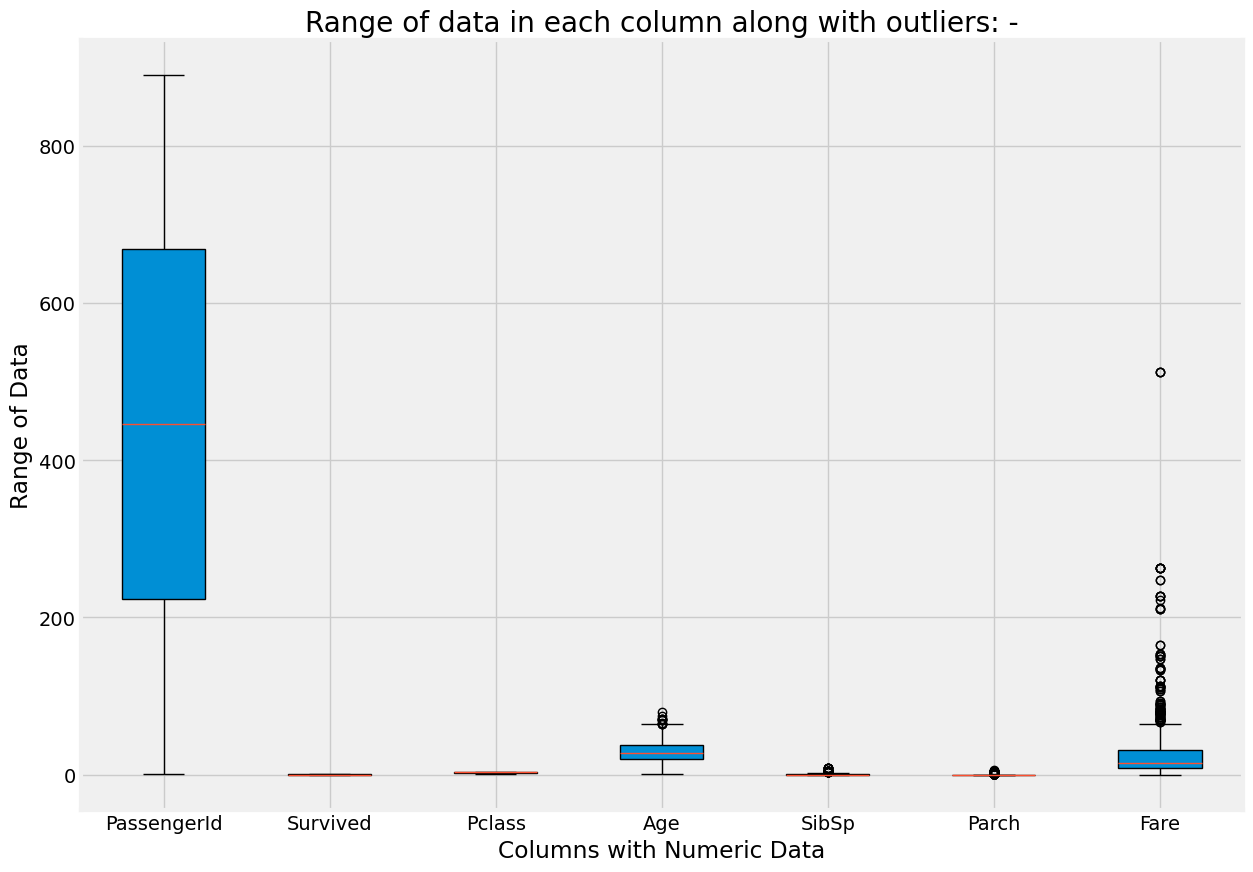

In [7]:
#We can also use the box and whiskers plot to visualize which of the columns have outliers more clearly.
plt.figure(figsize = (15,10), dpi = 100)
plt.style.use("fivethirtyeight")
plt.boxplot([titanic_data["PassengerId"],
            titanic_data["Survived"],
            titanic_data["Pclass"],
            titanic_data["Age"].dropna(),
            titanic_data["SibSp"],
            titanic_data["Parch"],
            titanic_data["Fare"]],patch_artist=True,labels=["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"])
plt.xlabel("Columns with Numeric Data")
plt.ylabel("Range of Data")
plt.title("Range of data in each column along with outliers: -")
plt.show()

### Using the groupby() method to group the data based on the "Pclass" column and calculate the mean fare for each unique class value in "Pclass" column: -

In [8]:
#groupby() function helps us to group the data in the dataframe based on the individual unique values in a particular column
#That column is "Pclass" in our case.
#Then we do the mean of all the columns with numerical values for each group, using the mean() function
#The numeric_only=True keyword argument is necessary to pass otherwise it will raise an error
#because we also have non-numeric columns in our dataframe
titanic_data.groupby("Pclass").mean(numeric_only=True)

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### Using the value_counts() method to get the frequency count of the Embarked column: -

In [9]:
#value_counts() function helps us count the no. of times each unique value for a particular column appears throughout all the entries in a dataframe
#That particular column in our case is the "Embarked" column
titanic_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
#The value_counts() function by default excludes the count value for which Null entries for a column.
#We can pass the dropna = False keyword argument as well, the get the count of entries where the "Embarked" column values were null.
titanic_data["Embarked"].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

### Creating a new column in the dataframe called AgeRange that categorises passengers into age ranges: "Child" for ages 0-12, "Teen" for ages 13-19, "Adult" for ages 20-59, and "Senior" for ages 60 and above: -

In [11]:
#Creating a list(labels) which stores the names for all the different categories
labels = ["Child","Teen","Adult","Senior"]
#creating category bins with range of each bin provided in tuples
#max(titanic_data["Age"]) returns the maximum value present in the "Age" column
#used to create upper bound of the "Senior" category
bins = pd.IntervalIndex.from_tuples([(0, 12), (13, 19), (20, 59),(60,max(titanic_data["Age"]))])
#Creating a new column in the dataframe called "AgeRange"
#All the entries in that column will be assigned by the cut() function, based on the category bins on the "Age" column
#include_lowest = True ensures that the category bins are inclusive of the values on their lower bound
titanic_data["AgeRange"] = pd.cut(titanic_data["Age"], bins = bins, include_lowest = True)
#titanic_data["AgeRange"].cat.rename_categories(labels) allows us to rename the categories from the numeric ranges to the equivalent labels
titanic_data["AgeRange"] = titanic_data["AgeRange"].cat.rename_categories(labels)
#Displaying the "AgeRange" column
titanic_data["AgeRange"]

0      Adult
1      Adult
2      Adult
3      Adult
4      Adult
       ...  
886    Adult
887     Teen
888      NaN
889    Adult
890    Adult
Name: AgeRange, Length: 891, dtype: category
Categories (4, object): ['Child' < 'Teen' < 'Adult' < 'Senior']

In [12]:
#Printing the top 5 entries of the dataframe to check whether the "AgeRange" column was properly added
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


### Using the pivot_table() method to create a pivot table that shows the survival rate of passengers based on their sex, class, and age range: -

#### Based on Sex/Gender: -

In [24]:
#Copying the values of the "Survived" and "Sex" columns from the (titanic_data) dataframe into a new dataframe named (gender_specific_survival)
gender_specific_survival = titanic_data[["Survived","Sex"]].copy()
#Adding a new column called "Count" to gender_specific_survival where the values for all the entries in the dataframe will be initially 1 
gender_specific_survival["Count"] = np.ones(gender_specific_survival.shape[0],dtype=int)
#Creating a new dataframe called (gss_pivot_table) using the pivot_table() function
#It divides the "Count" column into different groups based on the the unique values of the "Sex" and "Survived" columns
#The unique values of the "Sex" column become the index values of the resulting dataframe
#The unique values of the "Survived" column become the columns of the resulting dataframe
#The aggfunc = count keyword argument applies the count() aggregate function over all the groups created
#and stores the result as entries in the cells of gss_pivot_table
gss_pivot_table = gender_specific_survival.pivot_table(index = "Sex", columns = "Survived", aggfunc = "count")
#displaying the gss_pivot_table
gss_pivot_table

Count     
Survived     0    1
Sex                
female      81  233
male       468  109

In [14]:
#Creating two numpy arrays full of zeros with lengths equal to the no. of rows in gss_pivot_table and datatype of each array is float
percent_dead_arr = np.zeros(gss_pivot_table.shape[0],dtype = "float")
percent_alive_arr = np.zeros(gss_pivot_table.shape[0],dtype = "float")

i = 0 #creating a variable i with initial value set to 0
#running a loop through all the rows in gss_pivot_table
for index,row in gss_pivot_table.iterrows():
    #Storing the dead and alive percentage values of passengers out of all passengers in each index category of gss_pivot_table
    #in the respective positions of the percent_dead_arr and percent_alive_arr arrays
    percent_dead_arr[i] = (row[("Count",0)] / (row[("Count",0)] + row[("Count",1)])) * 100
    percent_alive_arr[i] = (row[("Count",1)] / (row[("Count",0)] + row[("Count",1)])) * 100
    i += 1#incrementing the loop variable
#Trying to insert two new MultiIndex columns within the gss_pivot_table as ("Percent(%)",0) and ("Percent(%)",1)
#The columns will be inserted at the righthand side of the gss_pivot_table 
#and the values will be arrays percent_dead_arr and percent_alive_arr respectively
#we do this using the insert() function
try:
    gss_pivot_table.insert(gss_pivot_table.shape[1],("Percent(%)",0),percent_dead_arr)
    gss_pivot_table.insert(gss_pivot_table.shape[1],("Percent(%)",1),percent_alive_arr)
except ValueError:
    #This part of the code was put in a try catch block because trying to recreate columns with the same names will result in a ValueError
    #We ignore this so that the code can excute without problems
    pass
gss_pivot_table

Count      Percent(%)           
Survived     0    1          0          1
Sex                                      
female      81  233  25.796178  74.203822
male       468  109  81.109185  18.890815

1. The female survival rate was about 74% while the male survival rate was about 19%.
2. A lot more women survived than men, a lot more men died than women.

#### Based on Class: -

In [15]:
#Same as above but using dataframes class_specific_survival and css_pivot_table instead
class_specific_survival = titanic_data[["Survived","Pclass"]].copy()
class_specific_survival["Count"] = np.ones(class_specific_survival.shape[0],dtype=int)
css_pivot_table = class_specific_survival.pivot_table(index = "Pclass", columns = "Survived", aggfunc = "count")
css_pivot_table

Count     
Survived     0    1
Pclass             
1           80  136
2           97   87
3          372  119

In [16]:
#Same as above but using dataframes class_specific_survival and css_pivot_table instead
percent_dead_arr = np.zeros(css_pivot_table.shape[0],dtype = "float")
percent_alive_arr = np.zeros(css_pivot_table.shape[0],dtype = "float")

i = 0
for index,row in css_pivot_table.iterrows():
    percent_dead_arr[i] = (row[("Count",0)] / (row[("Count",0)] + row[("Count",1)])) * 100
    percent_alive_arr[i] = (row[("Count",1)] / (row[("Count",0)] + row[("Count",1)])) * 100
    i += 1
try:
    css_pivot_table.insert(css_pivot_table.shape[1],("Percent(%)",0),percent_dead_arr)
    css_pivot_table.insert(css_pivot_table.shape[1],("Percent(%)",1),percent_alive_arr)
except ValueError:
    pass
css_pivot_table

Count      Percent(%)           
Survived     0    1          0          1
Pclass                                   
1           80  136  37.037037  62.962963
2           97   87  52.717391  47.282609
3          372  119  75.763747  24.236253

1. The passengers with Pclass = 1 had the highest survival rate(around 63 %).
2. For the passengers with Pclass = 2 the survival rate(around 53 %) was almost nearabout the same as their mortality rate(47 %).
3. The passengers with Pclass = 3 had the lowest survival rate(only about 24 % of them survived).

#### Based on Age Range: -

In [17]:
#Same as above but using dataframes agerange_specific_survival and arss_pivot_table instead
age_range_specific_survival = titanic_data[["Survived","AgeRange"]].copy()
age_range_specific_survival["Count"] = np.ones(age_range_specific_survival.shape[0],dtype=int)
arss_pivot_table = age_range_specific_survival.pivot_table(index = "AgeRange", columns = "Survived", aggfunc = "count")
arss_pivot_table

Count     
Survived     0    1
AgeRange           
Child       29   40
Teen        56   37
Adult      308  201
Senior      17    5

In [18]:
#Same as above but using dataframes agerange_specific_survival and arss_pivot_table instead
percent_dead_arr = np.zeros(arss_pivot_table.shape[0],dtype = "float")
percent_alive_arr = np.zeros(arss_pivot_table.shape[0],dtype = "float")

i = 0
for index,row in arss_pivot_table.iterrows():
    percent_dead_arr[i] = (row[("Count",0)] / (row[("Count",0)] + row[("Count",1)])) * 100
    percent_alive_arr[i] = (row[("Count",1)] / (row[("Count",0)] + row[("Count",1)])) * 100
    i += 1
try:
    arss_pivot_table.insert(arss_pivot_table.shape[1],("Percent(%)",0),percent_dead_arr)
    arss_pivot_table.insert(arss_pivot_table.shape[1],("Percent(%)",1),percent_alive_arr)
except ValueError:
    pass
arss_pivot_table

Count      Percent(%)           
Survived     0    1          0          1
AgeRange                                 
Child       29   40  42.028986  57.971014
Teen        56   37  60.215054  39.784946
Adult      308  201  60.510806  39.489194
Senior      17    5  77.272727  22.727273

1. The Child age group had the highest survival rate(around 58%).
2. The survival and mortality rates for both Teen and Adult age groups are near about the same as each other, despite the total number of passengers in the Adult age group vastly outnumbering the ones in the Teen age group.
3. The passengers under the Senior age group had the lowest survival rate(around 23%) while also being the age group with the lowest number of passengers onboard.

### Creating a bar chart that shows the total number of passengers in each age range: -

In [19]:
#titanic_age_range_categories stores the number of passengers per category in "AgeRange" by using the valuecounts() function
titanic_age_range_categories = titanic_data["AgeRange"].value_counts()
#displaying the titanic_age_range_categories Series
titanic_age_range_categories

AgeRange
Adult     509
Teen       93
Child      69
Senior     22
Name: count, dtype: int64

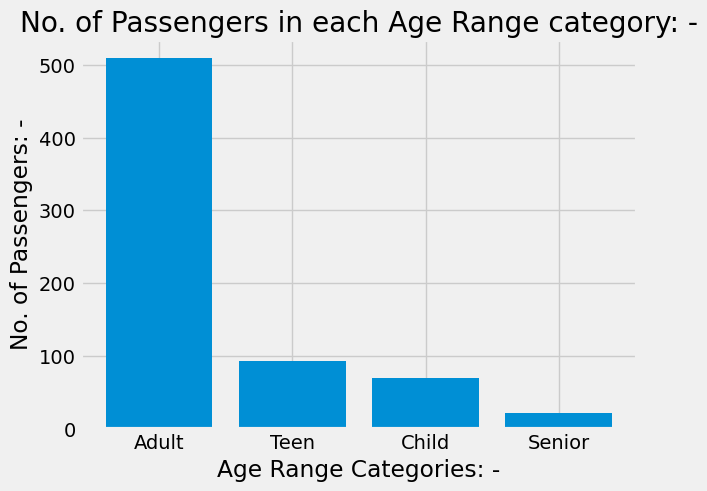

In [20]:
#plotting a bar plot with the indexes on the x-axis and the values on the y-axis of the titanic_age_range_categories dataframe
plt.bar(titanic_age_range_categories.index,titanic_age_range_categories.values)
#Setting the x-axis label
plt.xlabel("Age Range Categories: -")
#Setting the y-axis label
plt.ylabel("No. of Passengers: -")
#Setting the title of the graph
plt.title("No. of Passengers in each Age Range category: -")
#Displaying the plot
plt.show()

### Creating a scatter plot that shows the relationship between age and fare and coloring the points based on whether the passenger survived or not: -

In [21]:
#Creating 2 separate dicts for dead and alive values with keys "Age" and "Fare" for both of them.
#The values are empty lists initially
dict_alive_values = {"Age":[],"Fare":[]}
dict_dead_values = {"Age":[],"Fare":[]}
#Storing the "Age", "Fare" & "Survived" column of the titanic_data dataframe into a new dataframe called age_fare_relation_table
age_fare_relation_table = titanic_data[["Age","Fare","Survived"]]
#Running a loop over all the rows in all the rows in age_fare_relation_table
for index,row in age_fare_relation_table.iterrows():
    #If the "Survived" column value of a row is 0, append the "Age" and "Fare" column values of that row into the appropriate lists of dict_dead_values
    if row["Survived"] == 0:
        dict_dead_values["Age"].append(row["Age"])
        dict_dead_values["Fare"].append(row["Fare"])
        #If the "Survived" column value of a row is 1, append the "Age" and "Fare" column values of that row into the appropriate lists of dict_alive_values
    elif row["Survived"] == 1:
        dict_alive_values["Age"].append(row["Age"])
        dict_alive_values["Fare"].append(row["Fare"])

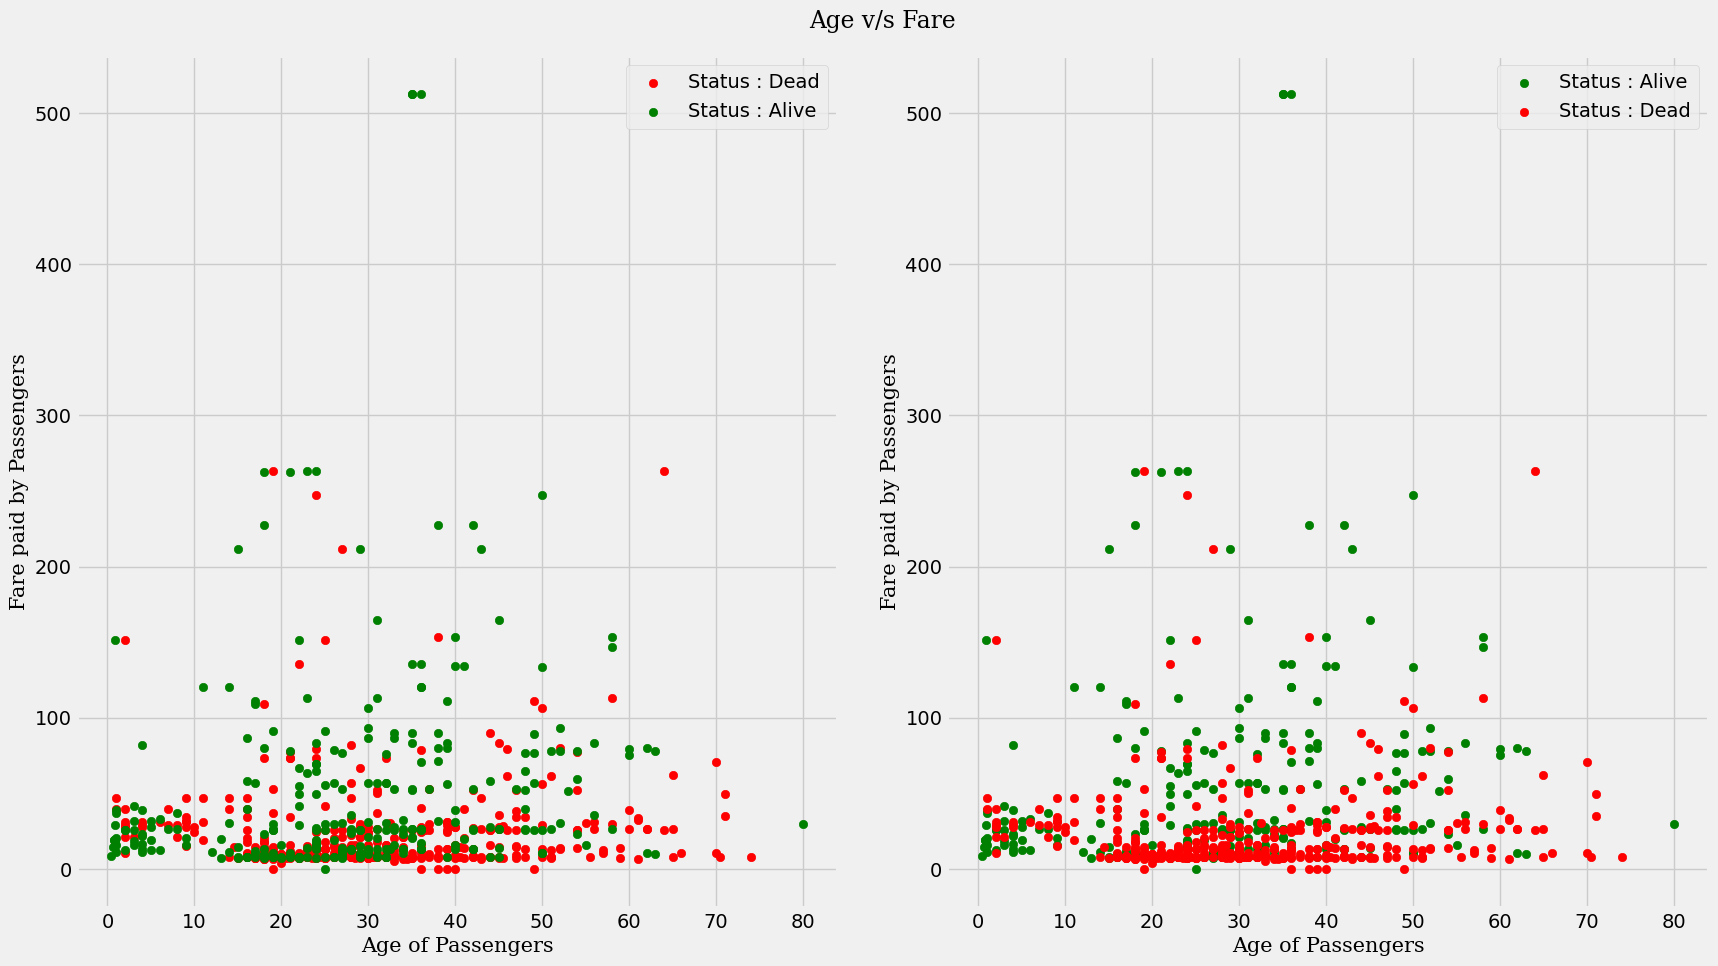

In [22]:
#Creating a figure containing 2 axes using subplots function
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (18,10))
#using the "dark_background" style for the plot
plt.style.use("bmh")

#Adjusting the gaps between the 2 plots and the gaps between the plots and the figure
plt.subplots_adjust(wspace = 0.1,hspace = 0.1)
plt.tight_layout(pad = 3)

#plotting dict_alive_values after dict_dead_values so the data points for the people alive appear in the foreground
ax1.scatter(dict_dead_values["Age"],dict_dead_values["Fare"],color="red",label="Status : Dead")
ax1.scatter(dict_alive_values["Age"],dict_alive_values["Fare"],color="green",label="Status : Alive")

#plotting dict_dead_values after dict_alive_values so the data points for the dead people appear in the foreground
ax2.scatter(dict_alive_values["Age"],dict_alive_values["Fare"],color="green",label="Status : Alive")
ax2.scatter(dict_dead_values["Age"],dict_dead_values["Fare"],color="red",label="Status : Dead")

#Setting up the various x-axis labels and y-axis labels along with the legends and the title
ax1.set_xlabel("Age of Passengers",fontdict={"family":"serif","size":15})
ax1.set_ylabel("Fare paid by Passengers",fontdict={"family":"serif","size":15})
ax2.set_xlabel("Age of Passengers",fontdict={"family":"serif","size":15})
ax2.set_ylabel("Fare paid by Passengers",fontdict={"family":"serif","size":15})
ax1.legend()
ax2.legend()
fig.suptitle("Age v/s Fare",fontdict={"family":"serif","size":40,"weight":"bold"})

#displaying the plot
plt.show()

1. The fare paid seems to have remained somewhat constant regardless of the passengers age
2. However, as the fare value increases, there seems to be more passengers who survived compared to passengers who died.